In [1]:
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [3]:
# Carregar o dataset
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/archive/winequality-red.csv")

In [4]:
# Separar features e labels
X = df.drop(columns=["quality"])
y = df["quality"]

# Normalizar os dados
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Converter labels para categorias
encoder = LabelEncoder()
y = encoder.fit_transform(y)

In [5]:
# Dividir em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Variar número de camadas escondidas
hidden_layers = [1, 2, 3, 4, 5]
accuracies = []
times = []

In [6]:
for layers in hidden_layers:
    start_time = time.time()
    model = Sequential()
    model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))

    # Adicionar camadas escondidas
    for _ in range(layers):
        model.add(Dense(64, activation='relu'))

    model.add(Dense(len(np.unique(y)), activation='softmax'))

    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    history = model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=0, validation_data=(X_test, y_test))

    accuracy = model.evaluate(X_test, y_test, verbose=0)[1]
    accuracies.append(accuracy)
    times.append(time.time() - start_time)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


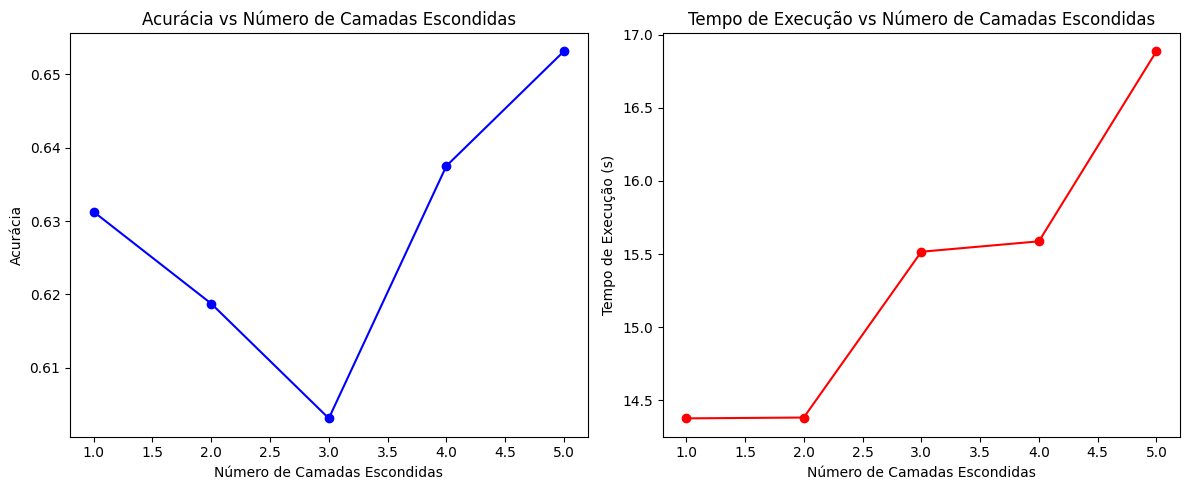

In [8]:
# Plotar gráficos
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(hidden_layers, accuracies, marker='o', linestyle='-', color='b')
plt.xlabel('Número de Camadas Escondidas')
plt.ylabel('Acurácia')
plt.title('Acurácia vs Número de Camadas Escondidas')

plt.subplot(1, 2, 2)
plt.plot(hidden_layers, times, marker='o', linestyle='-', color='r')
plt.xlabel('Número de Camadas Escondidas')
plt.ylabel('Tempo de Execução (s)')
plt.title('Tempo de Execução vs Número de Camadas Escondidas')

plt.tight_layout()
plt.show()

# CONCLUSÕES

Acurácia: O desempenho do modelo pode melhorar até certo ponto com o aumento das camadas escondidas, mas eventualmente pode estagnar ou até piorar devido a overfitting.

Tempo de execução: Redes mais profundas exigem mais tempo de treinamento devido ao aumento de parâmetros a serem ajustados.

Compromisso entre desempenho e eficiência: Pode haver um número ideal de camadas escondidas que equilibra precisão e tempo de execução.